<a href="https://colab.research.google.com/github/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/Examen01_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, asi podemos despejar  de la ecuación para $x$ el tiempo:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la siguiente ecuación  ecuación trascendental.


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

 Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













##SOLUCIÓN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

##Punto 1

Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$

In [2]:
def f(x,theta,v0,b,g):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)
  y = ((g/b)+v0y)*(x/v0x) + (g/b**2)*np.log(1-(x*b/v0x))
  return y

##Punto 2

Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.

In [3]:
g = 9.8
v0 = 55
theta = 45
b = 0.005
g = 9.8
R = optimize.newton(f,308,args=(45,55,0.005,9.8))
print(f"El valor del ancance máximo R es: {R}")

El valor del ancance máximo R es: 300.69207669319997


##Punto 3

Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior.

In [4]:
def df(x,theta,v0,b,g):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)
  dy = ((g+b*v0y)/(b*v0x))-(g/b)*(1/(v0x-x*b))
  return dy

g = 9.8
v0 = 55
theta = 45
b = 0.005

R = optimize.newton(f,308,df,args=(45,55,0.005,9.8))
print(f"Utilizando otro método podemos ver que el valor del ancance máximo R es: {R}")

Utilizando otro método podemos ver que el valor del ancance máximo R es: 300.69207669319167


Determine el tiempo de vuelo $t_v$.

In [5]:
def tv(R,theta,v0,b):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)
  tv = (-1/b)*np.log(1-(R*b)/v0x)
  return tv

g = 9.8
v0 = 55
theta = 45
b = 0.005
R = optimize.newton(f,308,args=(45,55,0.005,9.8))
tiempo_de_vuelo = tv(R,theta,v0,b)
print(f"El tiempo de vuelo asociado al acance máximo R = {R} es: {tiempo_de_vuelo}")

El tiempo de vuelo asociado al acance máximo R = 300.69207669319997 es: 7.885101833164458


##Punto 4

Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

$x$ vs $t$

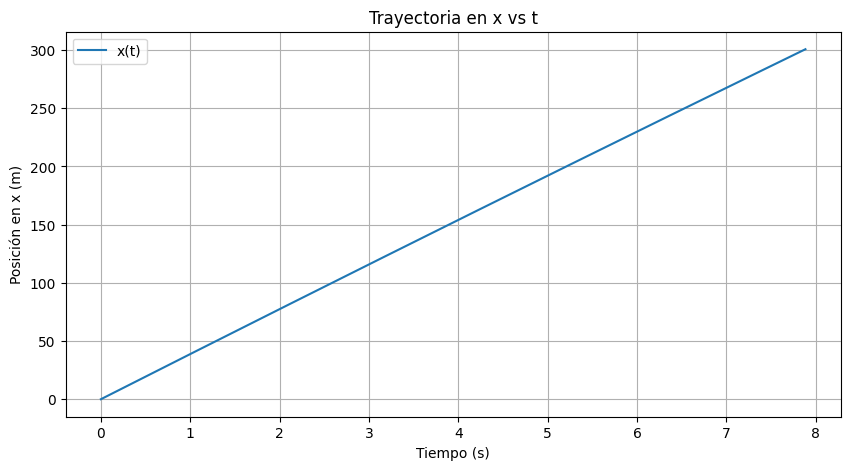

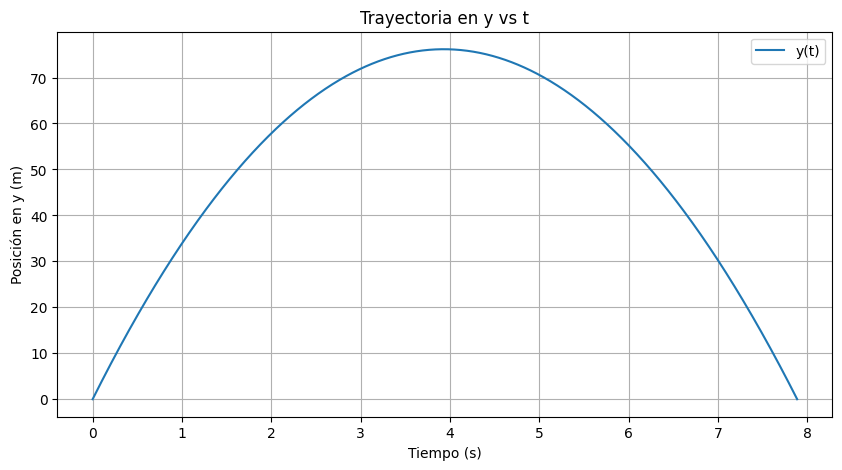

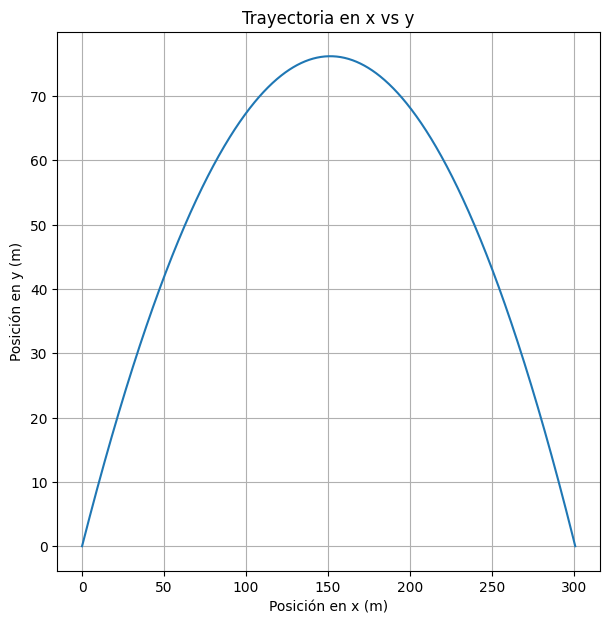

In [6]:
v0 = 55
theta = 45
b = 0.005
g = 9.8
tv_ = 7.885101833164458

v0x = v0 * np.cos(np.radians(theta))
v0y = v0 * np.sin(np.radians(theta))

def x(t,theta,v0,b):
  return (v0x/b) * (1-np.e**(-b*t))

def y(t,theta,v0,b,g):
  return (1/b)*((g/b)+v0y)*(1-np.e**(-b*t))-g*t/b

t = np.linspace(0, tv_, 1000)

x = x(t,theta,v0,b)
y = y(t,theta,v0,b,g)

plt.figure(figsize=(10, 5))
plt.plot(t, x, label='x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en x (m)')
plt.title('Trayectoria en x vs t')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(t, y, label='y(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en y (m)')
plt.title('Trayectoria en y vs t')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
plt.plot(x, y)
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.title('Trayectoria en x vs y')
plt.grid(True)
plt.show()

##Punto 5

Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

In [7]:
#Datos:
b = 0.009
v0 = 40
valores_theta = np.arange(0,90,5) #Puedo estar equivocado, pero considero que no hace falta poner "np.deg2rad", ya que cuando tomamos estos valores de theta, en la función f(x,theta,v0,b,g) y tv(x,theta,v0,b), theta ya se pasa a radianes

def tv(R,theta,v0,b):
  theta = np.deg2rad(theta)
  v0x = v0*np.cos(theta)
  v0y = v0*np.sin(theta)
  tv = (-1/b)*np.log(1-(R*b)/v0x)
  return tv

valores_R = []
valores_tv = []

for theta in valores_theta:
  R = optimize.newton(f,308,args=(theta,40,0.009,9.8))
  valores_R.append(R)
  tv_vals = tv(R,theta,40,0.009)
  valores_tv.append(tv_vals)

print(f"Alcance máximo R asociado a cada ángulo: {valores_R}")
print(f"Tiempos de vuelvo para cada alcance máximo R con su respectivo ángulo: {valores_tv}")

Alcance máximo R asociado a cada ángulo: [2.2418003296543263e-05, 28.230148289199203, 55.36860162391236, 80.60916747084065, 103.2122943132049, 122.52570349280852, 138.00196717537833, 149.2126532224349, 155.8587730872934, 157.7773813249993, 154.9442820552023, 147.47289662984764, 135.60943641294466, 119.72460416184555, 100.30211669916834, 77.92440045689845, 53.2558604169895, 27.02416248420588]
Tiempos de vuelvo para cada alcance máximo R con su respectivo ángulo: [5.604500828190146e-07, 0.7107177718907474, 1.4145347893213909, 2.106154739614606, 2.7804053104877346, 3.432274512333348, 4.056944997531005, 4.649826243701165, 5.206584498191992, 5.7231704077325265, 6.195844279922488, 6.621198942096891, 6.996180178267335, 7.318104736488667, 7.584675907521597, 7.793996681256341, 7.944580490567739, 8.03535955331593]


##Punto 6

Realice un gráfico de $R$ vs $t_v$

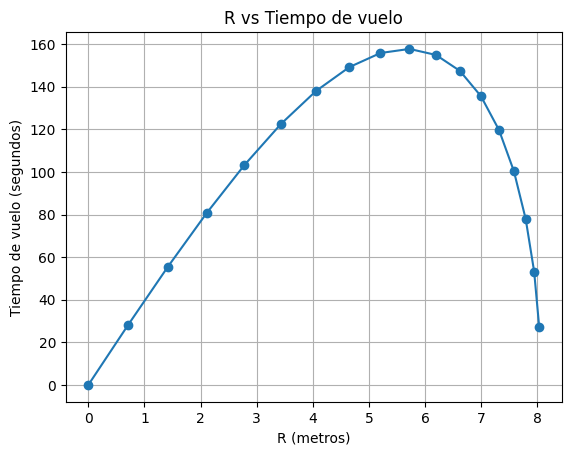

In [8]:
plt.plot(valores_tv, valores_R, marker='o')
plt.xlabel('R (metros)')
plt.ylabel('Tiempo de vuelo (segundos)')
plt.title('R vs Tiempo de vuelo')
plt.grid(True)
plt.show()

#Punto 7

Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.

Curvas en un mismo grafico

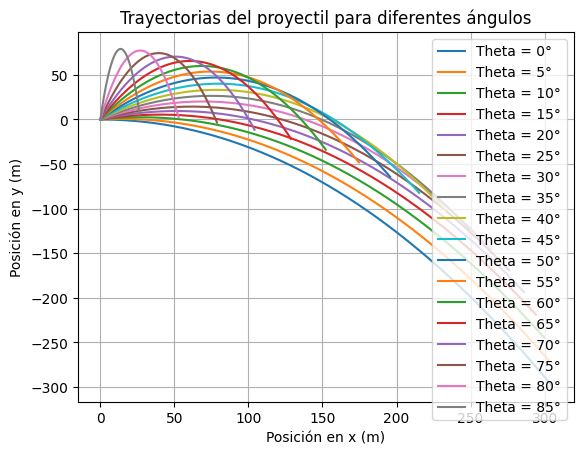

In [9]:
#Datos:
v0 = 40
b = 0.009
g = 9.8
tv = 7.885101833164458
valores_theta = np.arange(0,90,5)
t = np.linspace(0, tv, 1000)


def x(t,theta,v0,b):
  return (v0x/b) * (1-np.e**(-b*t))

def y(t,theta,v0,b,g):
  return (1/b)*((g/b)+v0y)*(1-np.e**(-b*t))-g*t/b


for theta in valores_theta:
  v0x = v0 * np.cos(np.radians(theta))
  v0y = v0 * np.sin(np.radians(theta))
  x_val = x(t,theta,v0,b)
  y_val = y(t,theta,v0,b,g)
  plt.plot(x_val, y_val, label=f'Theta = {theta}°')

# Agregar etiquetas y título
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.title('Trayectorias del proyectil para diferentes ángulos')
plt.grid(True)
plt.legend()  # Mostrar leyenda con etiquetas de los ángulos
plt.show()

Todas las curvas en diferentes graficos

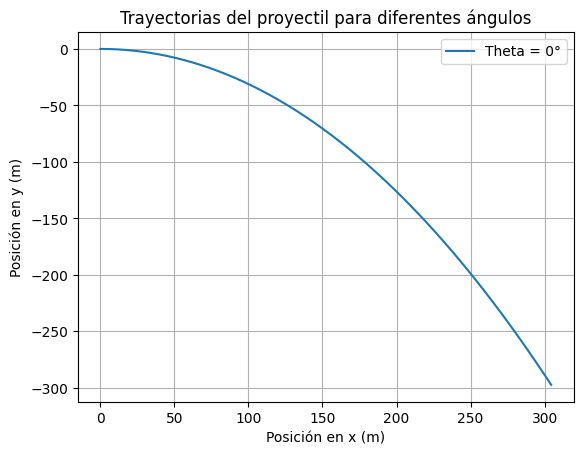

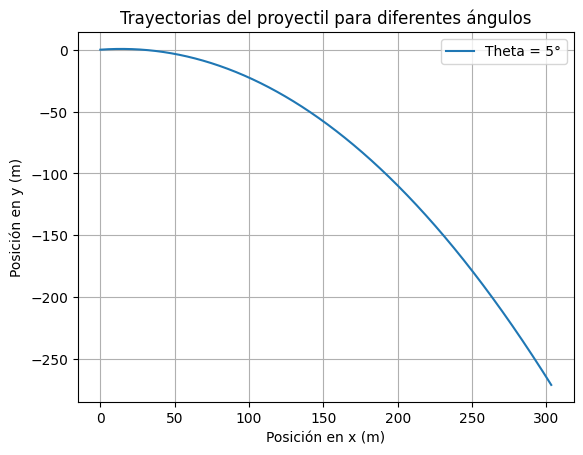

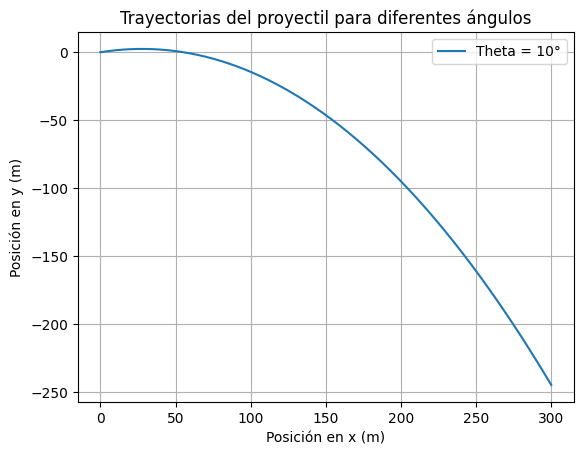

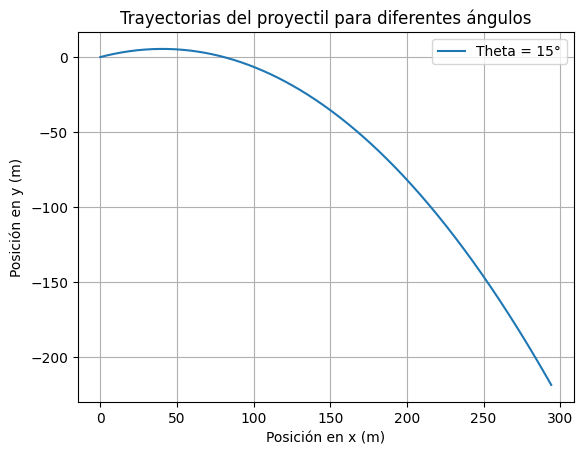

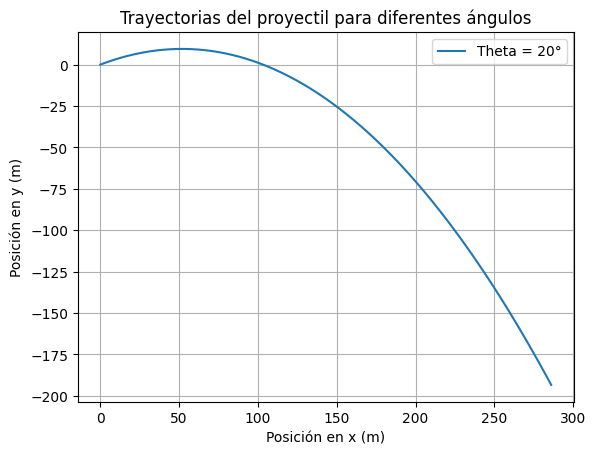

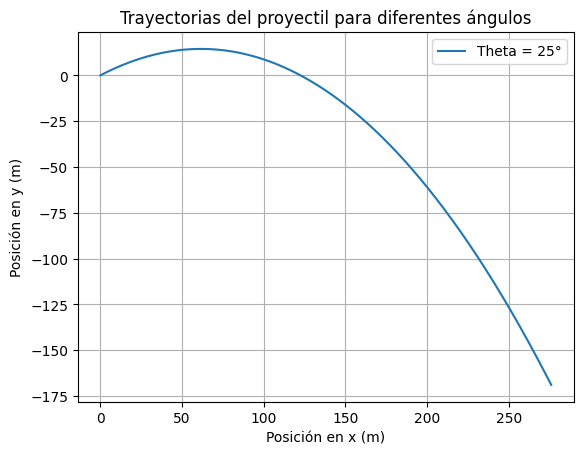

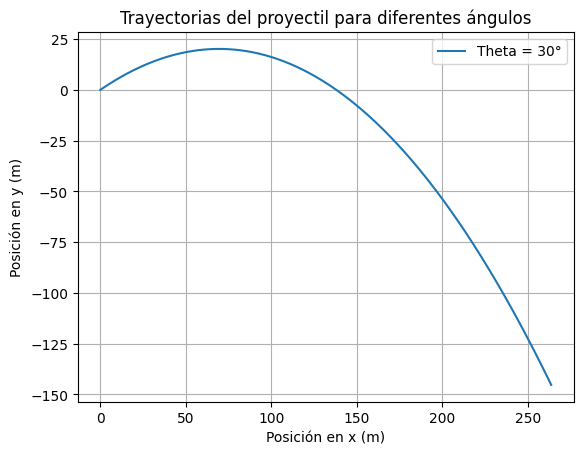

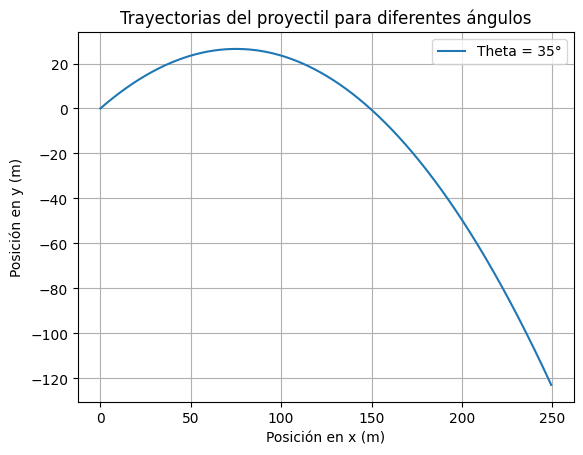

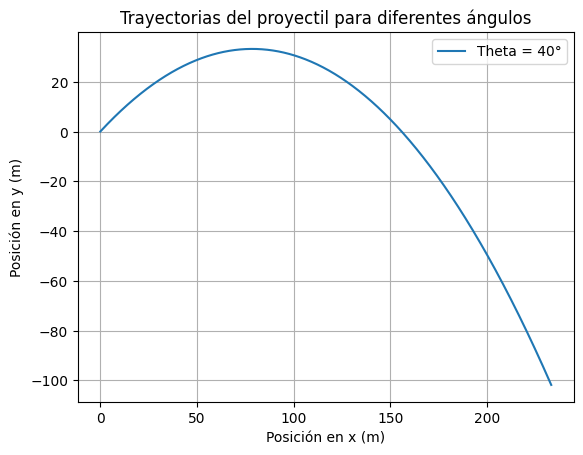

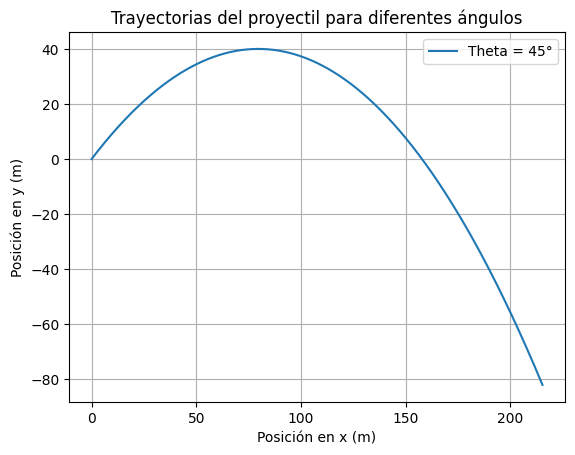

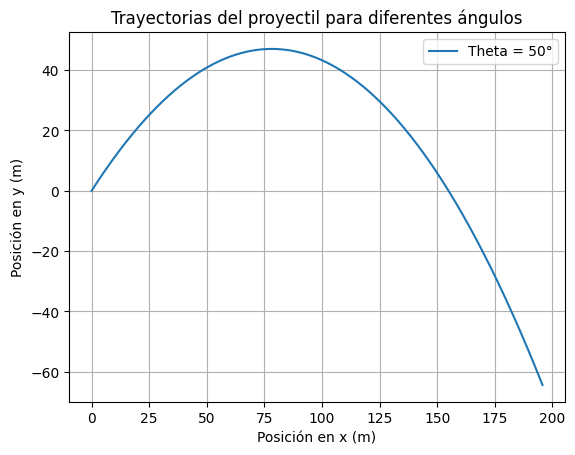

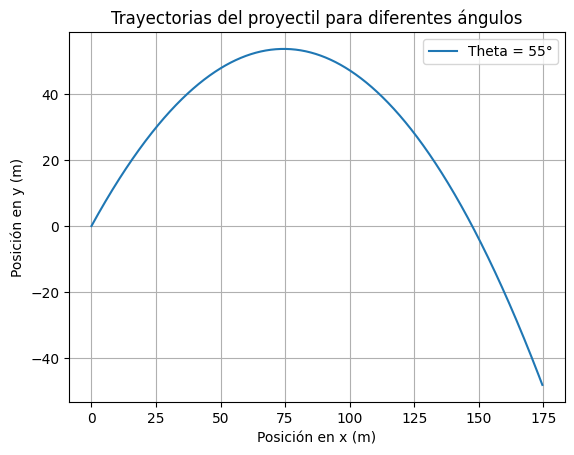

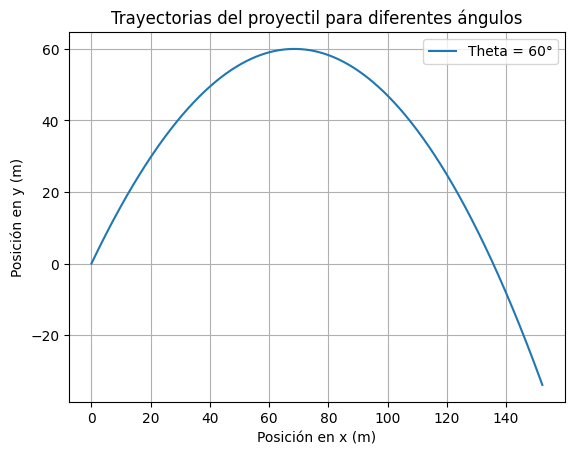

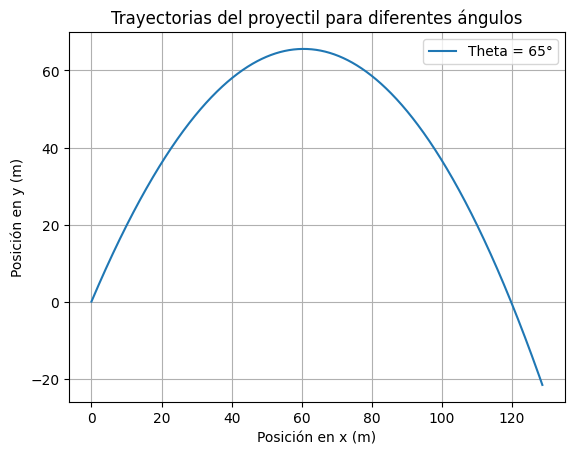

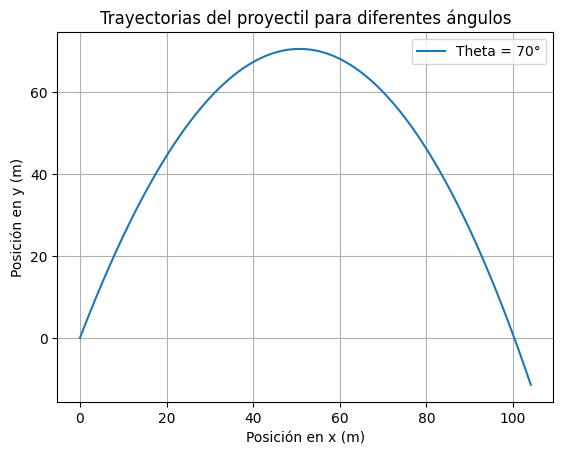

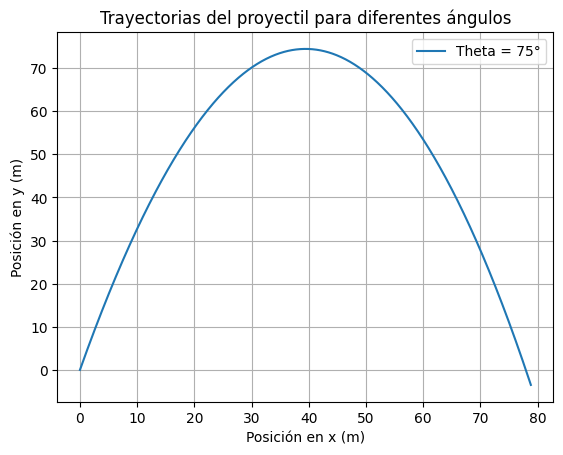

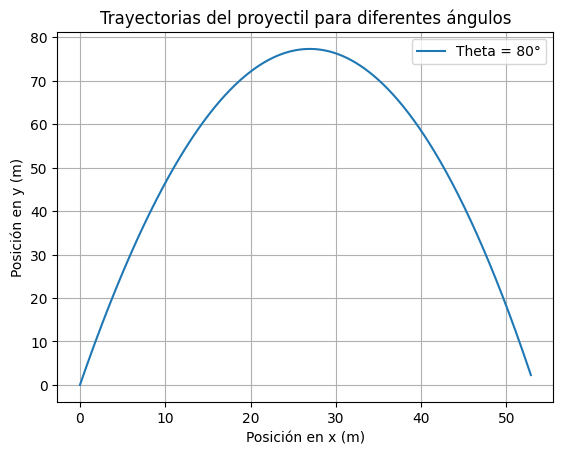

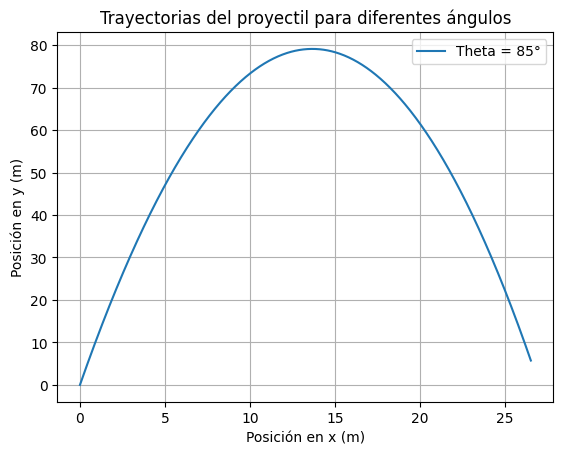

In [10]:
#Datos:
v0 = 40
b = 0.009
g = 9.8
tv = 7.885101833164458
valores_theta = np.arange(0,90,5)
t = np.linspace(0, tv, 1000)


def x(t,theta,v0,b):
  return (v0x/b) * (1-np.e**(-b*t))

def y(t,theta,v0,b,g):
  return (1/b)*((g/b)+v0y)*(1-np.e**(-b*t))-g*t/b


for theta in valores_theta:
  v0x = v0 * np.cos(np.radians(theta))
  v0y = v0 * np.sin(np.radians(theta))
  x_val = x(t,theta,v0,b)
  y_val = y(t,theta,v0,b,g)
  plt.plot(x_val, y_val, label=f'Theta = {theta}°')
  plt.xlabel('Posición en x (m)')
  plt.ylabel('Posición en y (m)')
  plt.title('Trayectorias del proyectil para diferentes ángulos')
  plt.grid(True)
  plt.legend()
  plt.show()